# Binary_Classification_of_Iris

### [Assignment 1] Select features and categories for practice


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
# Store features matrix in 
data = pd.DataFrame(data= np.c_[iris['data']],
                  columns= iris['feature_names'])
print(data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [3]:
#Store target vector in
target =  pd.DataFrame(data= np.c_[iris['target']],
                  columns=['Species'])
target.head()
df = pd.concat([data, target], axis=1)
df = df.loc[df['Species'].isin([1, 2])]
df = df.reset_index(drop=True)
df.head(7)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,7.0,3.2,4.7,1.4,1
1,6.4,3.2,4.5,1.5,1
2,6.9,3.1,4.9,1.5,1
3,5.5,2.3,4.0,1.3,1
4,6.5,2.8,4.6,1.5,1
5,5.7,2.8,4.5,1.3,1
6,6.3,3.3,4.7,1.6,1


In [4]:
df1 = df.loc[:,['sepal length (cm)', 'petal length (cm)', 'Species']]
df1.head()

,sepal length (cm),petal length (cm),Species
0,7.0,4.7,1
1,6.4,4.5,1
2,6.9,4.9,1
3,5.5,4.0,1
4,6.5,4.6,1


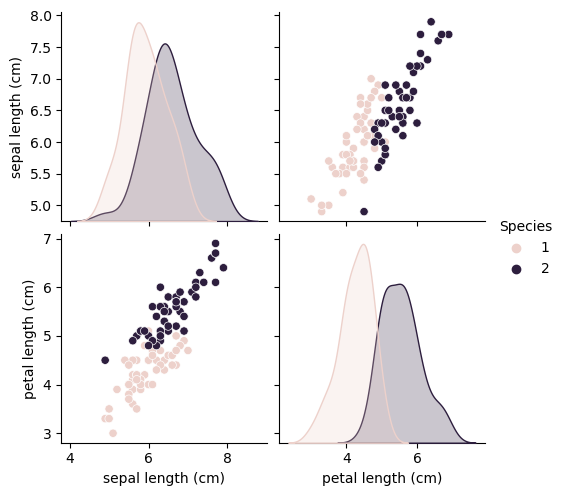

In [5]:
sns.pairplot(df1, hue='Species')

### [Question 2] Data analysis

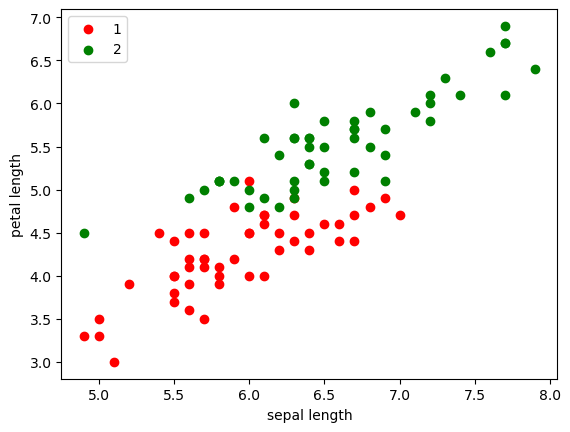

In [6]:
colors = ['red', 'green']
species = [1, 2] 
for i in range(2):
    x = df1[df1['Species'] == species[i]]
    plt.scatter(x['sepal length (cm)'], x['petal length (cm)'], c=colors[i], label=species[i])
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()


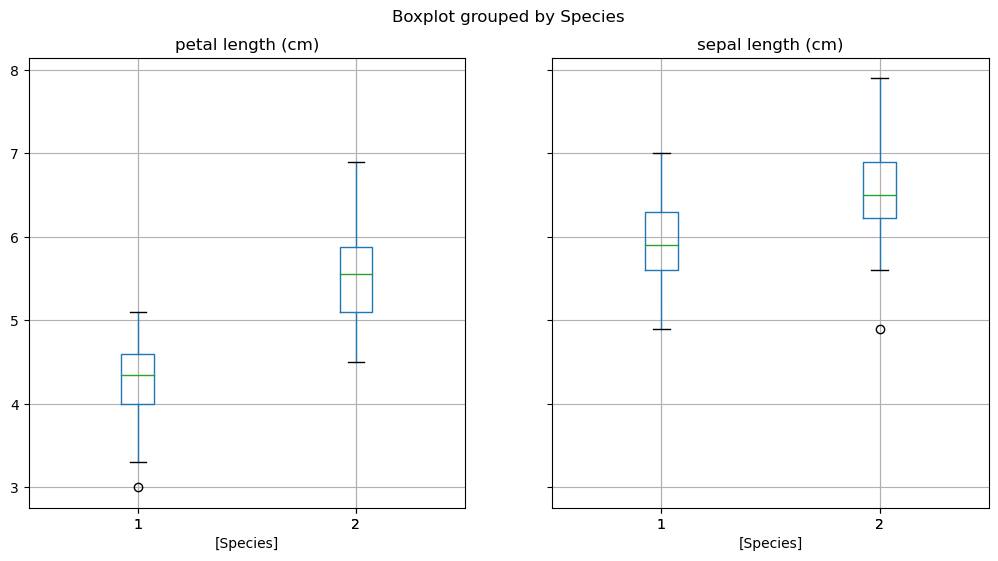

In [7]:
df1.boxplot(by='Species',figsize=(12,6))
plt.show()

<AxesSubplot:xlabel='Species', ylabel='petal length (cm)'>

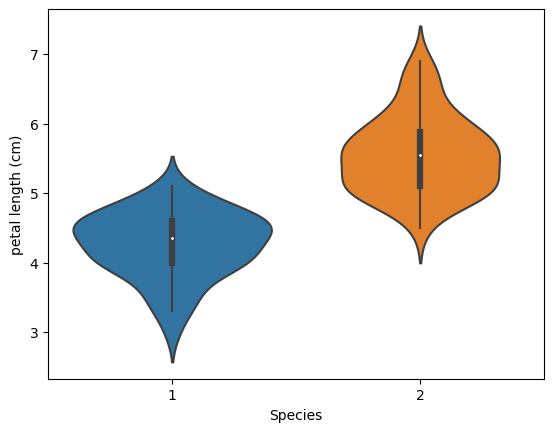

In [8]:
sns.violinplot(x='Species', y='petal length (cm)', data=df1, figsize=(12,6))

<AxesSubplot:xlabel='Species', ylabel='sepal length (cm)'>

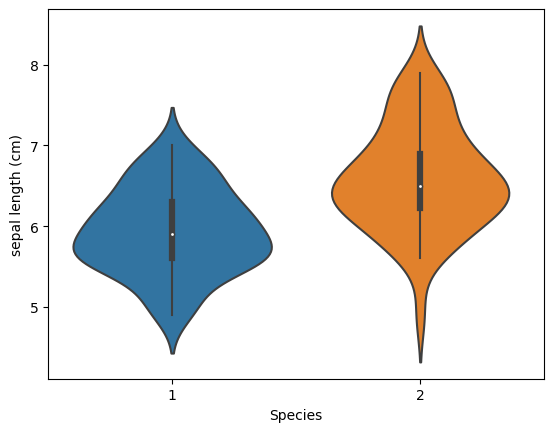

In [9]:
sns.violinplot(x='Species', y='sepal length (cm)', data=df1)

### [Problem 3] Division of preprocessing/training data and validation data

In [10]:
X = np.array(df1.loc[:,['sepal length (cm)', 'petal length (cm)']])
X.shape

(100, 2)

In [11]:
X


array([[7. , 4.7],
       [6.4, 4.5],
       [6.9, 4.9],
       [5.5, 4. ],
       [6.5, 4.6],
       [5.7, 4.5],
       [6.3, 4.7],
       [4.9, 3.3],
       [6.6, 4.6],
       [5.2, 3.9],
       [5. , 3.5],
       [5.9, 4.2],
       [6. , 4. ],
       [6.1, 4.7],
       [5.6, 3.6],
       [6.7, 4.4],
       [5.6, 4.5],
       [5.8, 4.1],
       [6.2, 4.5],
       [5.6, 3.9],
       [5.9, 4.8],
       [6.1, 4. ],
       [6.3, 4.9],
       [6.1, 4.7],
       [6.4, 4.3],
       [6.6, 4.4],
       [6.8, 4.8],
       [6.7, 5. ],
       [6. , 4.5],
       [5.7, 3.5],
       [5.5, 3.8],
       [5.5, 3.7],
       [5.8, 3.9],
       [6. , 5.1],
       [5.4, 4.5],
       [6. , 4.5],
       [6.7, 4.7],
       [6.3, 4.4],
       [5.6, 4.1],
       [5.5, 4. ],
       [5.5, 4.4],
       [6.1, 4.6],
       [5.8, 4. ],
       [5. , 3.3],
       [5.6, 4.2],
       [5.7, 4.2],
       [5.7, 4.2],
       [6.2, 4.3],
       [5.1, 3. ],
       [5.7, 4.1],
       [6.3, 6. ],
       [5.8, 5.1],
       [7.1,

In [12]:
y = np.array(df1.loc[:,['Species']]).ravel()
y.ndim

1

In [13]:
y.shape

(100,)

In [14]:
# split to train and Test load these libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
X_train.shape

(75, 2)

In [17]:
 X_test.shape

(25, 2)

### [Problem 4] Preprocessing and standardization

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_trainTransform = scaler.transform(X_train)
X_testTransform = scaler.transform(X_test)

### [Question 5] Learning and Estimation


In [19]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiate learning model (k = 5)
classifier5 = KNeighborsClassifier(n_neighbors=5)
classifier5.fit(X_trainTransform, y_train)

# Predicting the Test set results
y_pred5 = classifier5.predict(X_testTransform)
print("pred5 = ", y_pred5)

# Instantiate learning model (k = 1)
classifier1 = KNeighborsClassifier(n_neighbors=1)
classifier1.fit(X_trainTransform, y_train)

# Predicting the Test set results
y_pred1 = classifier1.predict(X_testTransform)
print("pred1 = ", y_pred1)

# Instantiate learning model (k = 3)
classifier3 = KNeighborsClassifier(n_neighbors=3)
classifier3.fit(X_trainTransform, y_train)

# Predicting the Test set results
y_pred3 = classifier3.predict(X_testTransform)
print("pred3 = ", y_pred3)

# Instantiate learning model (k = 1)
classifier1 = KNeighborsClassifier(n_neighbors=1)
classifier1.fit(X_trainTransform, y_train)

# Predicting the Test set results
#y_pred1 = classifier1.predict(X_testTransform)
#print("pred1 = ", y_pred1)

pred5 =  [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
pred1 =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
pred3 =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNeighborsClassifier(n_neighbors=1)

### [Question 6] Evaluation

In [20]:
# Calculate 4 types of indicators using scikit-learn
# Display confusion matrix using scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

prediction = [y_pred5, y_pred1, y_pred3]
keys = ["knn5", "knn1", "knn3"]


for a, prediction in enumerate(prediction, 0):
    print("prediction of = ", keys[a])
    print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=prediction)*100)
    print("Recall = ", recall_score(y_true=y_test, y_pred=prediction, average=None))
    print("F1 score = ", f1_score(y_true=y_test, y_pred=prediction, average=None))
    print("Precission score = ", precision_score(y_true=y_test, y_pred=prediction, average=None))
    print("Confusion = ", confusion_matrix(y_true=y_test, y_pred=prediction))
    print('....................................................')

prediction of =  knn5
Accuracy =  80.0
Recall =  [0.92857143 0.63636364]
F1 score =  [0.83870968 0.73684211]
Precission score =  [0.76470588 0.875     ]
Confusion =  [[13  1]
 [ 4  7]]
....................................................
prediction of =  knn1
Accuracy =  80.0
Recall =  [0.85714286 0.72727273]
F1 score =  [0.82758621 0.76190476]
Precission score =  [0.8 0.8]
Confusion =  [[12  2]
 [ 3  8]]
....................................................
prediction of =  knn3
Accuracy =  80.0
Recall =  [0.85714286 0.72727273]
F1 score =  [0.82758621 0.76190476]
Precission score =  [0.8 0.8]
Confusion =  [[12  2]
 [ 3  8]]
....................................................


In [21]:
# Briefly investigate the meaning of the four types of index values ​​and summarize them in sentences

### [Question 7] Visualization

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


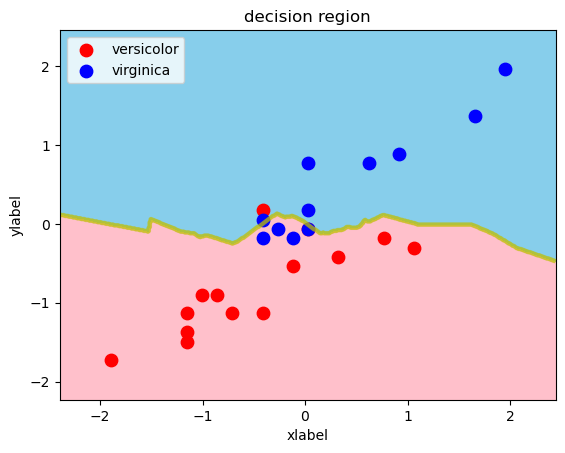

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


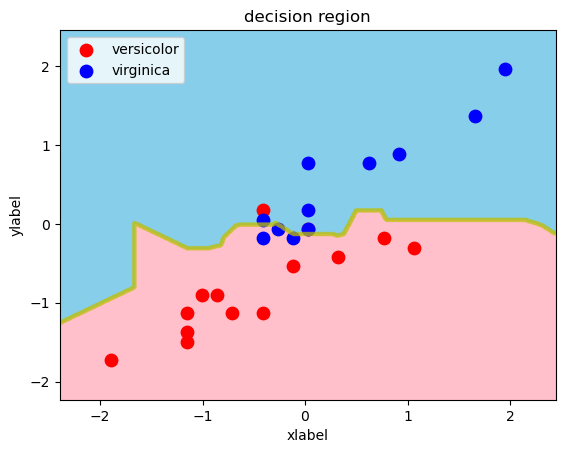

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


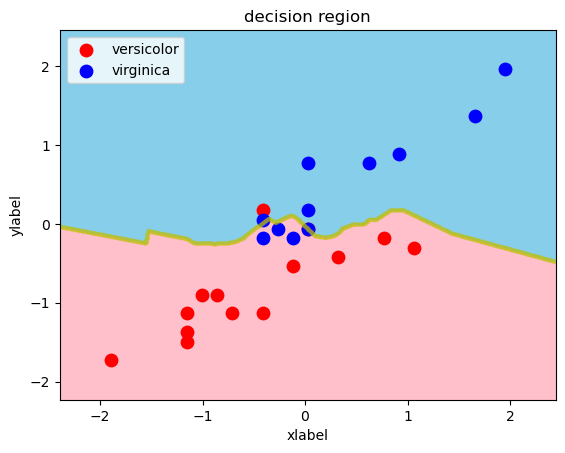

In [22]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
models = [classifier5, classifier1, classifier3]
for a, model in enumerate(models, 1):
    decision_region(X_testTransform, y_test, model)   

### [Question 8] Learning other methods

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [24]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
neig = KNeighborsClassifier()
neig.fit(X_trainTransform, y_train)
y_predn = neig.predict(X_testTransform)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [25]:
# LOGISTIC REGRESSION
lr_classifier = LogisticRegression()
lr_classifier.fit(X_trainTransform, y_train);
y_pred_lrc = lr_classifier.predict(X_testTransform)

In [26]:
#Create a svm Classifier
clf = svm.SVC() 
clf.fit(X_trainTransform, y_train)
y_pred_svm = clf.predict(X_test)


In [27]:
# DECISION TREE
dt_clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt_clf.fit(X_trainTransform, y_train)
y_preddt = dt_clf.predict(X_testTransform)

In [28]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_trainTransform, y_train)
y_predrf = rf_clf.predict(X_testTransform)

### Estimating, Evaluating and Visualization 

KNN
[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
Accuracy =  80.0
Recall =  [0.92857143 0.63636364]
F1 score =  [0.83870968 0.73684211]
Precission score =  [0.76470588 0.875     ]
Confusion =  [[13  1]
 [ 4  7]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


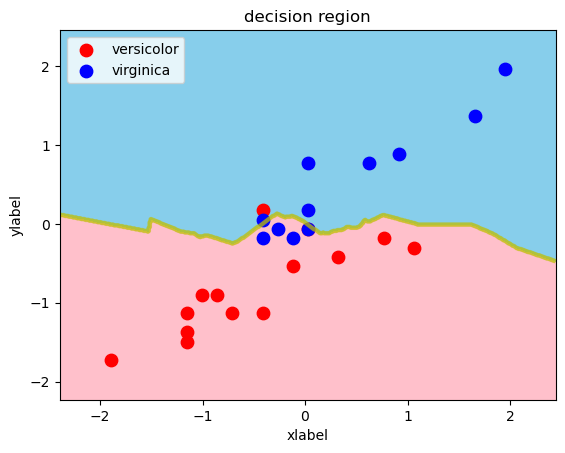



LOGISTIC REGRESSION
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
Accuracy =  84.0
Recall =  [0.85714286 0.81818182]
F1 score =  [0.85714286 0.81818182]
Precission score =  [0.85714286 0.81818182]
Confusion =  [[12  2]
 [ 2  9]]


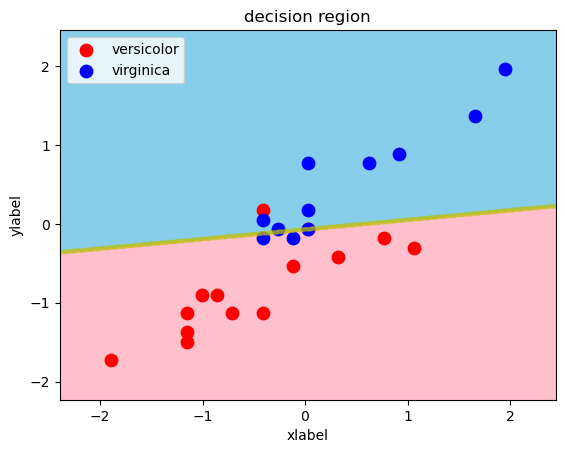



SVM
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Accuracy =  0.44
Recall =  [0. 1.]
F1 score =  [0.         0.61111111]
Precission score =  [0.   0.44]
Confusion =  [[ 0 14]
 [ 0 11]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


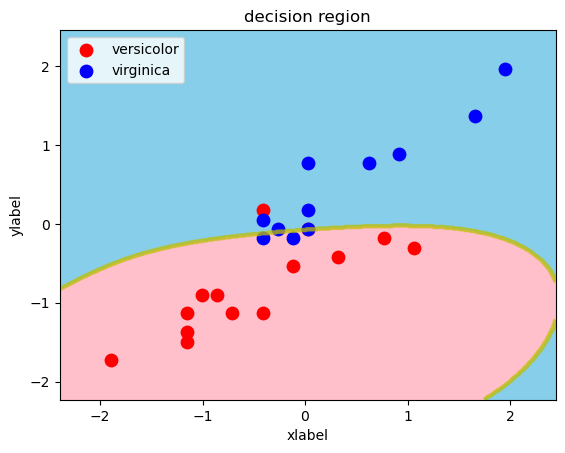



DECISION TREE
[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
Accuracy =  80.0
Recall =  [0.92857143 0.63636364]
F1 score =  [0.83870968 0.73684211]
Precission score =  [0.76470588 0.875     ]
Confusion =  [[13  1]
 [ 4  7]]


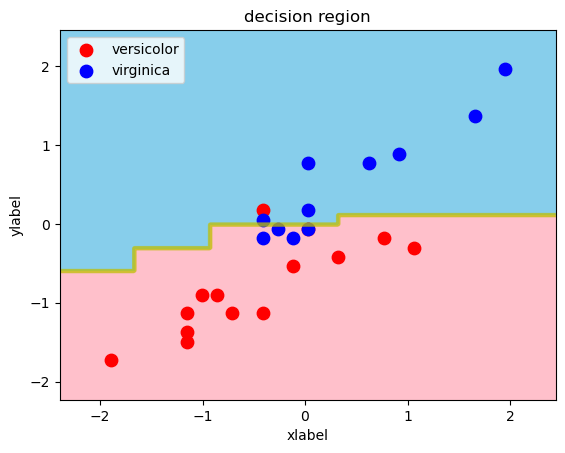



Random Forest
[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 2]
Accuracy =  84.0
Recall =  [0.92857143 0.72727273]
F1 score =  [0.86666667 0.8       ]
Precission score =  [0.8125     0.88888889]
Confusion =  [[13  1]
 [ 3  8]]


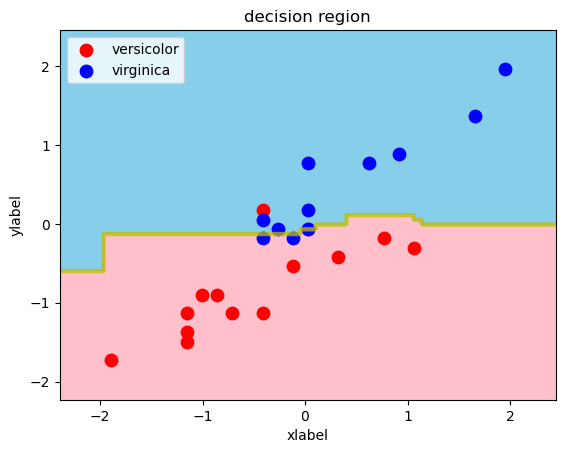

In [29]:
print("KNN")
print(y_predn)
print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=y_predn)*100)
print("Recall = ", recall_score(y_true=y_test, y_pred=y_predn, average=None))
print("F1 score = ", f1_score(y_true=y_test, y_pred=y_predn, average=None))
print("Precission score = ", precision_score(y_true=y_test, y_pred=y_predn, average=None))
print("Confusion = ", confusion_matrix(y_true=y_test, y_pred=y_predn))
decision_region(X_testTransform, y_test, neig)
print('\n')

print("LOGISTIC REGRESSION")
print(y_pred_lrc)
print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=y_pred_lrc)*100)
print("Recall = ", recall_score(y_true=y_test, y_pred=y_pred_lrc, average=None))
print("F1 score = ", f1_score(y_true=y_test, y_pred=y_pred_lrc, average=None))
print("Precission score = ", precision_score(y_true=y_test, y_pred=y_pred_lrc, average=None))
print("Confusion = ", confusion_matrix(y_true=y_test, y_pred=y_pred_lrc)) 
decision_region(X_testTransform, y_test, lr_classifier)
print('\n')

print("SVM")
print(y_pred_svm)
print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=y_pred_svm))
print("Recall = ", recall_score(y_true=y_test, y_pred=y_pred_svm, average=None))
print("F1 score = ", f1_score(y_true=y_test, y_pred=y_pred_svm, average=None))
print("Precission score = ", precision_score(y_true=y_test, y_pred=y_pred_svm, average=None))
print("Confusion = ", confusion_matrix(y_true=y_test, y_pred=y_pred_svm))    
decision_region(X_testTransform, y_test, clf)
print('\n')

print("DECISION TREE")
print(y_preddt)
print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=y_preddt)*100)
print("Recall = ", recall_score(y_true=y_test, y_pred=y_preddt, average=None))
print("F1 score = ", f1_score(y_true=y_test, y_pred=y_preddt, average=None))
print("Precission score = ", precision_score(y_true=y_test, y_pred=y_preddt, average=None))
print("Confusion = ", confusion_matrix(y_true=y_test, y_pred=y_preddt))    
decision_region(X_testTransform, y_test, dt_clf)
print('\n')

print("Random Forest")
print(y_predrf)
print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=y_predrf)*100)
print("Recall = ", recall_score(y_true=y_test, y_pred=y_predrf, average=None))
print("F1 score = ", f1_score(y_true=y_test, y_pred=y_predrf, average=None))
print("Precission score = ", precision_score(y_true=y_test, y_pred=y_predrf, average=None))
print("Confusion = ", confusion_matrix(y_true=y_test, y_pred=y_predrf))
decision_region(X_testTransform, y_test, rf_clf)

### [Question 9] (Advanced task) Comparison with and without standardization

In [30]:
def comp_standard(title, prediction, model, std):
    print(title)
    print("Accuracy = ", accuracy_score(y_true=y_test, y_pred= prediction)*100)
    print("Recall = ", recall_score(y_true=y_test, y_pred=prediction, average=None))
    print("F1 score = ", f1_score(y_true=y_test, y_pred=prediction, average=None))
    print("Precission score = ", precision_score(y_true=y_test, y_pred=prediction, average=None))
    print("Confusion = ", confusion_matrix(y_true=y_test, y_pred=prediction))    
    decision_region(X_test, y_test, model)
model = [neig, lr_classifier, clf, dt_clf, rf_clf]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNN
Accuracy =  80.0
Recall =  [0.92857143 0.63636364]
F1 score =  [0.83870968 0.73684211]
Precission score =  [0.76470588 0.875     ]
Confusion =  [[13  1]
 [ 4  7]]


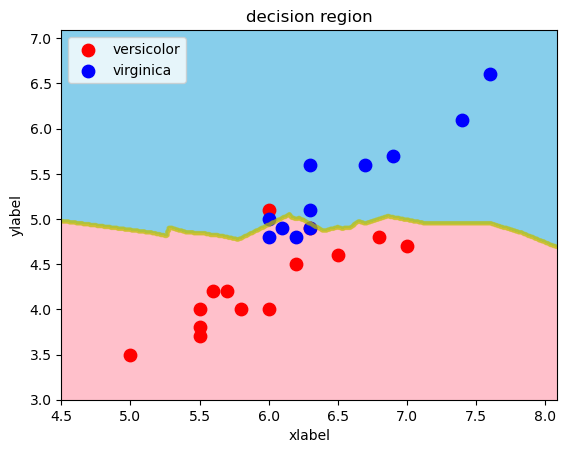

....................................................
LOGISTIC REGRESSION
Accuracy =  84.0
Recall =  [0.85714286 0.81818182]
F1 score =  [0.85714286 0.81818182]
Precission score =  [0.85714286 0.81818182]
Confusion =  [[12  2]
 [ 2  9]]


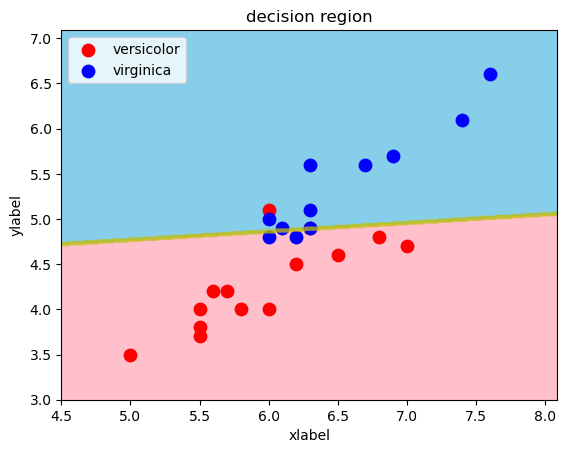

....................................................
SVM
Accuracy =  84.0
Recall =  [0.85714286 0.81818182]
F1 score =  [0.85714286 0.81818182]
Precission score =  [0.85714286 0.81818182]
Confusion =  [[12  2]
 [ 2  9]]


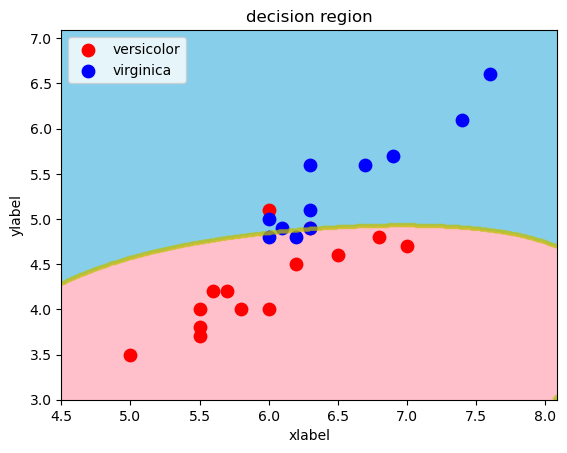

....................................................
DECISION TREE
Accuracy =  80.0
Recall =  [0.92857143 0.63636364]
F1 score =  [0.83870968 0.73684211]
Precission score =  [0.76470588 0.875     ]
Confusion =  [[13  1]
 [ 4  7]]


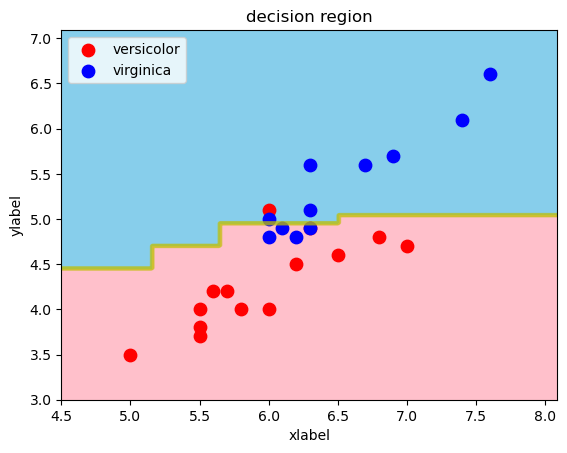

....................................................
Random Forest
Accuracy =  84.0
Recall =  [0.92857143 0.72727273]
F1 score =  [0.86666667 0.8       ]
Precission score =  [0.8125     0.88888889]
Confusion =  [[13  1]
 [ 3  8]]


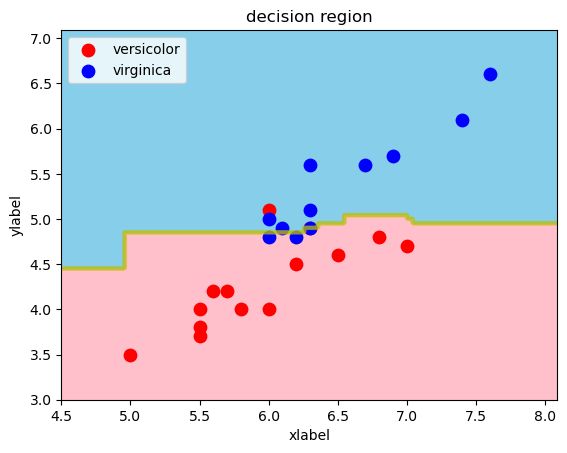

In [31]:
# KNN
neig = KNeighborsClassifier()
neig.fit(X_train, y_train)
y_predn = neig.predict(X_test)
comp_standard('KNN', y_predn, neig, std=False)
print('....................................................')
# LOGISTIC REGRESSION
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train);
y_pred_lrc = lr_classifier.predict(X_test)
comp_standard('LOGISTIC REGRESSION', y_pred_lrc, lr_classifier, std=False)
print('....................................................')
#Create a svm Classifier
clf = svm.SVC() 
clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)
comp_standard("SVM", y_pred_svm, clf, std=False)
print('....................................................')
# DECISION TREE
dt_clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt_clf.fit(X_train, y_train)
y_preddt = dt_clf.predict(X_test)
comp_standard('DECISION TREE', y_preddt, dt_clf, std=False)
print('....................................................')
#Random Forest
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
y_predrf = rf_clf.predict(X_test)
comp_standard('Random Forest', y_predrf, rf_clf, std=False)

### [Problem 10] (Advanced assignment) Highly accurate method using all target variables

In [32]:
# New training set
X1 = np.array(data.loc[:,['sepal length (cm)', 'petal length (cm)']])
X1.shape

(150, 2)

In [33]:
y1 = np.array(target).ravel()
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
# TRAIN TEST SPLIT
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42)
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((112, 2), (38, 2), (112,), (38,))

In [35]:
# KNN
kneig = KNeighborsClassifier(n_neighbors=3)
kneig.fit(X1_train, y1_train)
y1_predn = kneig.predict(X1_test)

# LOGISTIC REGRESSION
lr_clf = LogisticRegression()
lr_clf.fit(X1_train, y1_train);
y1_pred_lrc = lr_clf.predict(X1_test)

#Create a svm Classifier
svm_clf = svm.SVC() 
svm_clf.fit(X1_train, y1_train)
y1_pred_svm = svm_clf.predict(X1_test)

# DECISION TREE
dtree_clf = DecisionTreeClassifier()
dtree_clf.fit(X1_train, y1_train)
y1_preddt = dtree_clf.predict(X1_test)

#Random Forest
ranf_clf = RandomForestClassifier(random_state=0)
ranf_clf.fit(X1_train, y1_train)
y1_predrf = ranf_clf.predict(X1_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [36]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region1(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica', 'Setosa']):
    # setting
    scatter_color = ['red', 'blue', 'green']
    contourf_color = ['pink', 'skyblue', 'purple']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
models = [kneig, lr_clf, svm_clf, dtree_clf, ranf_clf]
#for a,model in enumerate(models, 1):
    #ecision_region1(X1_test, y1_test, model)   
  

KNN
[1 0 2 1 1 0 1 1 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Accuracy =  94.73684210526315
Recall =  [1.         0.90909091 0.91666667]
F1 score =  [1.         0.90909091 0.91666667]
Precission score =  [1.         0.90909091 0.91666667]
Confusion =  [[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


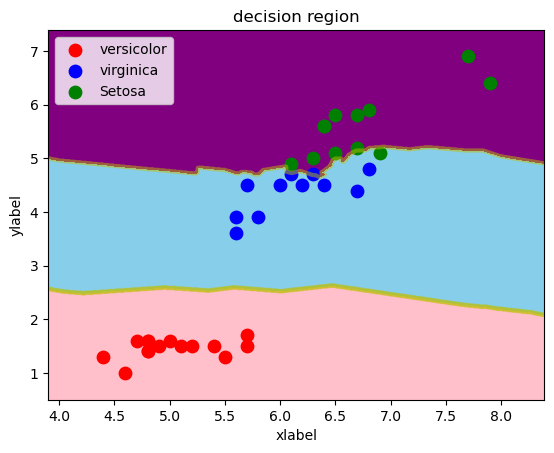

....................................................
LOGISTIC REGRESSION
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Accuracy =  100.0
Recall =  [1. 1. 1.]
F1 score =  [0.85714286 0.81818182]
Precission score =  [1. 1. 1.]
Confusion =  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


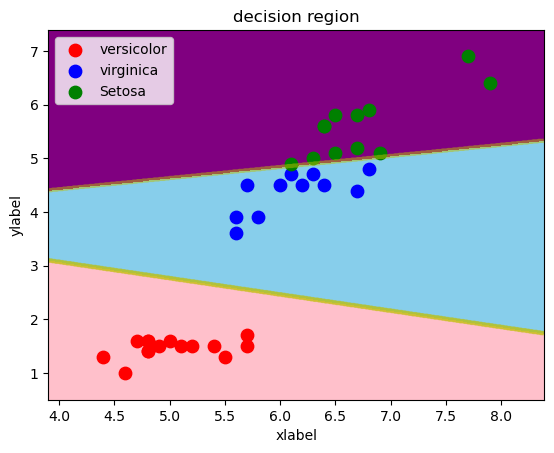

....................................................
SVM
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Accuracy =  1.0
Recall =  [1. 1. 1.]
F1 score =  [1. 1. 1.]
Precission score =  [1. 1. 1.]
Confusion =  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


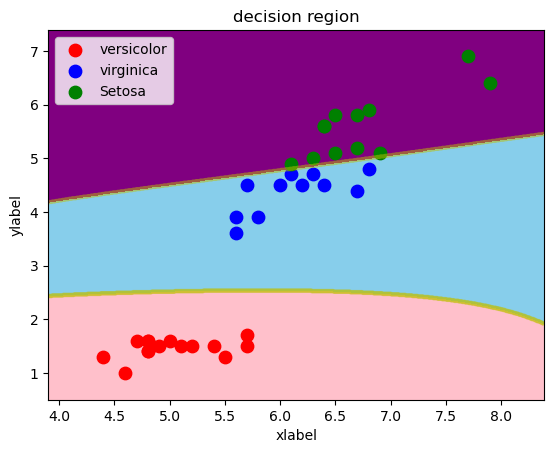

....................................................
DECISION TREE
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 1 1
 0]
Accuracy =  97.36842105263158
Recall =  [1.         1.         0.91666667]
F1 score =  [1.         0.95652174 0.95652174]
Precission score =  [1.         0.91666667 1.        ]
Confusion =  [[15  0  0]
 [ 0 11  0]
 [ 0  1 11]]


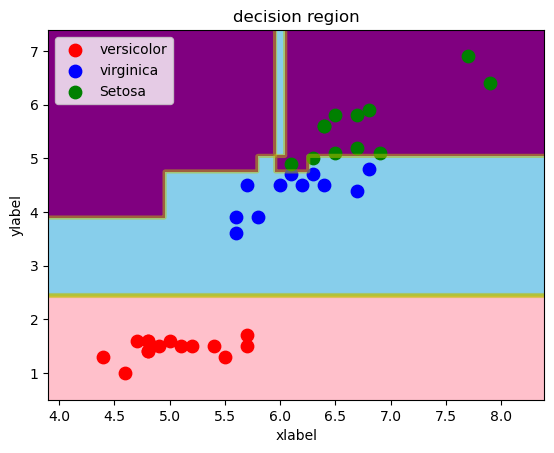

....................................................
Random Forest
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Accuracy =  100.0
Recall =  [1. 1. 1.]
F1 score =  [1. 1. 1.]
Precission score =  [1. 1. 1.]
Confusion =  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


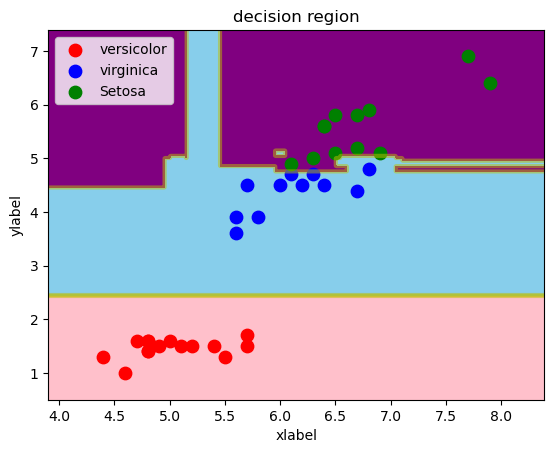

In [37]:
print("KNN")
print(y1_predn)
print("Accuracy = ", accuracy_score(y_true=y1_test, y_pred=y1_predn)*100)
print("Recall = ", recall_score(y_true=y1_test, y_pred=y1_predn, average=None))
print("F1 score = ", f1_score(y_true=y1_test, y_pred=y1_predn, average=None))
print("Precission score = ", precision_score(y_true=y1_test, y_pred=y1_predn, average=None))
print("Confusion = ", confusion_matrix(y_true=y1_test, y_pred=y1_predn))
decision_region1(X1_test, y1_test, kneig)
print('....................................................') 

print("LOGISTIC REGRESSION")
print(y1_pred_lrc)
print("Accuracy = ", accuracy_score(y_true=y1_test, y_pred=y1_pred_lrc)*100)
print("Recall = ", recall_score(y_true=y1_test, y_pred=y1_pred_lrc, average=None))
print("F1 score = ", f1_score(y_true=y_test, y_pred=y_pred_lrc, average=None))
print("Precission score = ", precision_score(y_true=y1_test, y_pred=y1_pred_lrc, average=None))
print("Confusion = ", confusion_matrix(y_true=y1_test, y_pred=y1_pred_lrc)) 
decision_region1(X1_test, y1_test, lr_clf)
print('....................................................') 

print("SVM")
print(y1_pred_svm)
print("Accuracy = ", accuracy_score(y_true=y1_test, y_pred=y1_pred_svm))
print("Recall = ", recall_score(y_true=y1_test, y_pred=y1_pred_svm, average=None))
print("F1 score = ", f1_score(y_true=y1_test, y_pred=y1_pred_svm, average=None))
print("Precission score = ", precision_score(y_true=y1_test, y_pred=y1_pred_svm, average=None))
print("Confusion = ", confusion_matrix(y_true=y1_test, y_pred=y1_pred_svm))    
decision_region1(X1_test, y1_test, svm_clf)
print('....................................................') 

print("DECISION TREE")
print(y1_preddt)
print("Accuracy = ", accuracy_score(y_true=y1_test, y_pred=y1_preddt)*100)
print("Recall = ", recall_score(y_true=y1_test, y_pred=y1_preddt, average=None))
print("F1 score = ", f1_score(y_true=y1_test, y_pred=y1_preddt, average=None))
print("Precission score = ", precision_score(y_true=y1_test, y_pred=y1_preddt, average=None))
print("Confusion = ", confusion_matrix(y_true=y1_test, y_pred=y1_preddt))    
decision_region1(X1_test, y1_test, dtree_clf)
print('....................................................') 

print("Random Forest")
print(y1_predrf)
print("Accuracy = ", accuracy_score(y_true=y1_test, y_pred=y1_predrf)*100)
print("Recall = ", recall_score(y_true=y1_test, y_pred=y1_predrf, average=None))
print("F1 score = ", f1_score(y_true=y1_test, y_pred=y1_predrf, average=None))
print("Precission score = ", precision_score(y_true=y1_test, y_pred=y1_predrf, average=None))
print("Confusion = ", confusion_matrix(y_true=y1_test, y_pred=y1_predrf))
decision_region1(X1_test, y1_test, ranf_clf)